In [1]:
## Run the following code for data prep
import pandas as pd 

df=pd.read_csv('movie_ratings(2).csv' )

first_genre=df['genres'].str.split('|', expand=True)[0]
df['main_genre']=first_genre

df['title']=df['title'].str.strip()
df['year']=df['title'].str[-5:-1]
df=df[df['year'].str.isnumeric()]
df['year']=pd.to_numeric(df['year'])

What are the yearly rating averages?

In [20]:
# Ans 1.
average_yearly_rating =df[['year','rating']].groupby('year').mean()
average_yearly_rating

rating
year          
1891  3.000000
1893  3.375000
1894  3.071429
1895  3.125000
1896  3.183036
...        ...
2011  3.162567
2012  3.104176
2013  3.145056
2014  3.122809
2015  2.813146

[118 rows x 1 columns]

Which years have the top 3 rating averages. Are you surprised to see these years? What can potentially explain the fact that these years have the highest averages ? 

In [67]:
#Ans. 2
average_yearly_rating.nlargest(3,'rating')
# I am surprised to see the years with the top 3 ratings. Less number of people rating the movies could be one of the 
#reasons why the ratings are so high.

rating
year          
1901  5.000000
1898  3.850000
1902  3.738189

Sort years based the number of films produced. Is there a pattern? What can we say about the movie production rate over the years. 

In [4]:
#Ans. 3
films_produced =df[['year','title']].groupby('year').count()
films_produced
# The number of movies produced annually has improved significantly in the 2000's as compared to the 1900's and 1800's

title
year       
2001    629
2002    676
2003    648
2004    700
2005    732
2006    844
2007    893
2008    968
2009   1101
2010    946
2011   1006
2012    997
2013    990
2014    710
2015     98

Which genres are most liked ? 

In [8]:
#Ans 4
best_genre = df[['main_genre','rating']].groupby('main_genre').mean()
best_genre.nlargest(20,'rating')

#As per raing "Film-Noir" has the higest rating. However, Documentary and Drama have more prduced movies and also got good 
#rating which make them the most liked genres.

rating
main_genre                  
Film-Noir           3.502881
Documentary         3.444347
Drama               3.276927
Crime               3.214546
War                 3.200764
Animation           3.167287
Adventure           3.104184
Comedy              3.090744
Mystery             3.063586
Romance             3.013840
Fantasy             2.997350
Western             2.986815
Action              2.976834
Thriller            2.969432
Musical             2.957358
Children            2.888802
Sci-Fi              2.799310
(no genres listed)  2.771531
Horror              2.604157
IMAX                2.533333

Which genres are most popular (in terms of production) ? 

In [10]:
#Ans. 5
most_popular =df[['genres', 'main_genre']].groupby('main_genre').count()
most_popular.nlargest(20,'genres')

# Below are the genres that are most popular in terms of production. Drama has the hishest number of movies made.

genres
main_genre                
Drama                 7709
Comedy                6668
Action                3465
Documentary           2173
Crime                 1586
Horror                1366
Adventure             1330
Animation              560
Children               405
Thriller               275
(no genres listed)     233
Western                207
Sci-Fi                 162
Romance                143
Mystery                139
Fantasy                135
Musical                 92
Film-Noir               38
War                     35
IMAX                     1

**Open Ended:** You are considering to invest in a movie. Having this dataset, try to narrow your options to a single genre. That's find the find the genre of movies that are more "investible". 

You can consider a few of parameters: 
 - average rating: it can be considered as the likelihood that the movie will be better received considering some genres have better ratings than others.  
 - number of movies: You can also consider the competition. 
 - changes over the years: Another aspect to explore is whether these genres are getting better or worse over the (recent) years. 
 - rating volatility (standard deviation): Also think about whether you are a risk taker or risk averse. Do you want to invest in a higly volitale genre (in terms of its ratings) or do you prefer to invest in a stable genre.   
 
While there are no wrong answers here, please support your decision with appropriate data analysis using pandas.

In [86]:
#Ans.6
#1. lets see the top 5 movies genre in terms of production and ratings and try to merge them.

Invest_genre1 = best_genre.nlargest(5,'rating')
Invest_genre1

rating
main_genre           
Film-Noir    3.502881
Documentary  3.444347
Drama        3.276927
Crime        3.214546
War          3.200764

In [87]:
Invest_genre2 =most_popular.nlargest(5,'genres')
Invest_genre2


genres
main_genre         
Drama          7709
Comedy         6668
Action         3465
Documentary    2173
Crime          1586

In [88]:
# Drama , Documentary and Crime are in both the sets.However, Crime has very low rating

In [82]:
Investible_genre = Invest_genre1.merge(Invest_genre2, on='main_genre', how='inner')
Investible_genre
#merging the two 

rating  genres
main_genre                   
Documentary  3.444347    2173
Drama        3.276927    7709
Crime        3.214546    1586
Animation    3.167287     560
Adventure    3.104184    1330
Comedy       3.090744    6668

In [85]:
t =Investible_genre.nlargest(2,'rating')
t.std()
#standard Deviation

rating       0.118384
genres    3914.543141
dtype: float64

In [ ]:

#plot

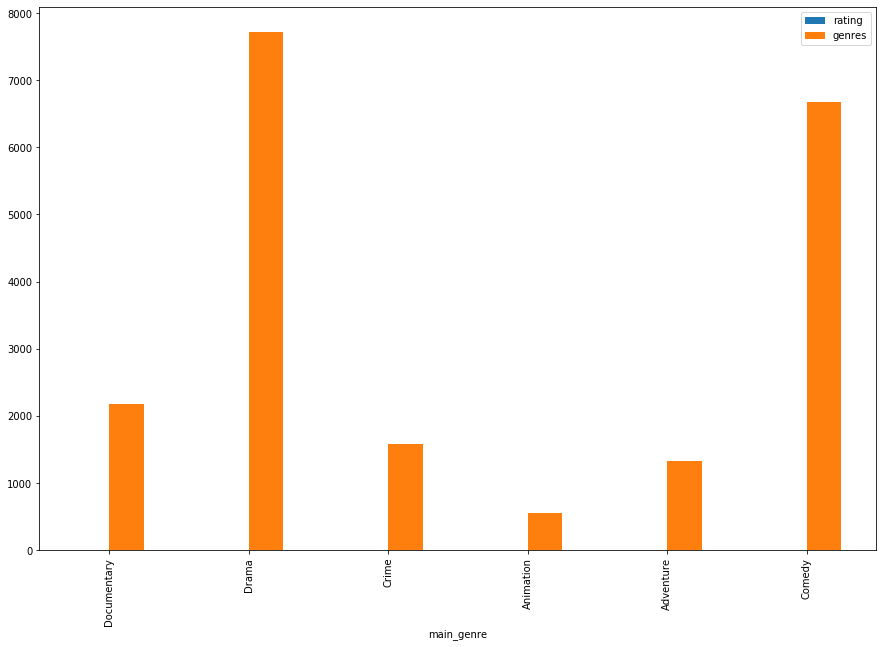

In [64]:
Investible_genre[:10].plot(kind='bar', figsize=(15,10))

In [ ]:
#1. In this instance I would be a "Risk averse" and invest my money on the Genre = Drama as it showing a good average rating 
# 2.Also the rate of producing this type of movie is great. Which makes it dependable
# 3.The standard deviation is also less in terms rating which makes it better than Documentary and rest.
#Hence, I would invest in the Genre "Drama"